<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Школа-глубокого-обучения-ФПМИ-МФТИ" data-toc-modified-id="Школа-глубокого-обучения-ФПМИ-МФТИ-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><b>Школа глубокого обучения ФПМИ МФТИ</b></a></span></li><li><span><a href="#Домашнее-задание.-Сегментация-изображений" data-toc-modified-id="Домашнее-задание.-Сегментация-изображений-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><b>Домашнее задание. Сегментация изображений</b></a></span><ul class="toc-item"><li><span><a href="#PyTorch-DataLoader" data-toc-modified-id="PyTorch-DataLoader-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>PyTorch DataLoader</a></span></li></ul></li></ul></li><li><span><a href="#Метрика" data-toc-modified-id="Метрика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Метрика</a></span></li><li><span><a href="#Функция-потерь-[1-балл]" data-toc-modified-id="Функция-потерь-[1-балл]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функция потерь [1 балл]</a></span></li><li><span><a href="#Тренировка-[1-балл]" data-toc-modified-id="Тренировка-[1-балл]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тренировка [1 балл]</a></span></li><li><span><a href="#Инференс-[1-балл]" data-toc-modified-id="Инференс-[1-балл]-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Инференс [1 балл]</a></span></li><li><span><a href="#Основной-момент:-обучение" data-toc-modified-id="Основной-момент:-обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Основной момент: обучение</a></span></li><li><span><a href="#Дополнительные-функции-потерь-[2-балла]" data-toc-modified-id="Дополнительные-функции-потерь-[2-балла]-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Дополнительные функции потерь [2 балла]</a></span></li><li><span><a href="#[BONUS]-Мир-сегментационных-лоссов-[5-баллов]" data-toc-modified-id="[BONUS]-Мир-сегментационных-лоссов-[5-баллов]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>[BONUS] Мир сегментационных лоссов [5 баллов]</a></span></li><li><span><a href="#U-Net-[2-балла]" data-toc-modified-id="U-Net-[2-балла]-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>U-Net [2 балла]</a></span></li><li><span><a href="#Отчет-(6-баллов):" data-toc-modified-id="Отчет-(6-баллов):-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчет (6 баллов):</a></span><ul class="toc-item"><li><span><a href="#Проверка-эффективности-разных-функций-потерь-для-Segnet" data-toc-modified-id="Проверка-эффективности-разных-функций-потерь-для-Segnet-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Проверка эффективности разных функций потерь для Segnet</a></span></li><li><span><a href="#Проверка-эффективности-разных-моделей-при-сегментации-изображений" data-toc-modified-id="Проверка-эффективности-разных-моделей-при-сегментации-изображений-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Проверка эффективности разных моделей при сегментации изображений</a></span></li><li><span><a href="#Тестируем-лучшую-модель" data-toc-modified-id="Тестируем-лучшую-модель-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Тестируем лучшую модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

---


1. Для начала мы скачаем датасет: [ADDI project](https://www.fc.up.pt/addi/ph2%20database.html).

<table><tr><td>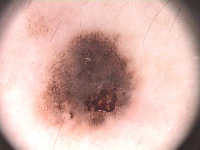</td><td>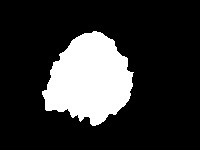</td></tr></table>

2. Разархивируем .rar файл.
3. Обратите внимание, что папка  `PH2 Dataset images` должна лежать там же где и ipynb notebook.

Это фотографии двух типов **поражений кожи:** меланома и родинки.
В данном задании мы не будем заниматься их классификацией, а будем **сегментировать** их.

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [ ]:
images = []
lesions = []
from skimage.io import imread
import os
root = 'PH2Dataset'

for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
    if root.endswith('_Dermoscopic_Image'):
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [ ]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [ ]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


In [ ]:
len(lesions)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

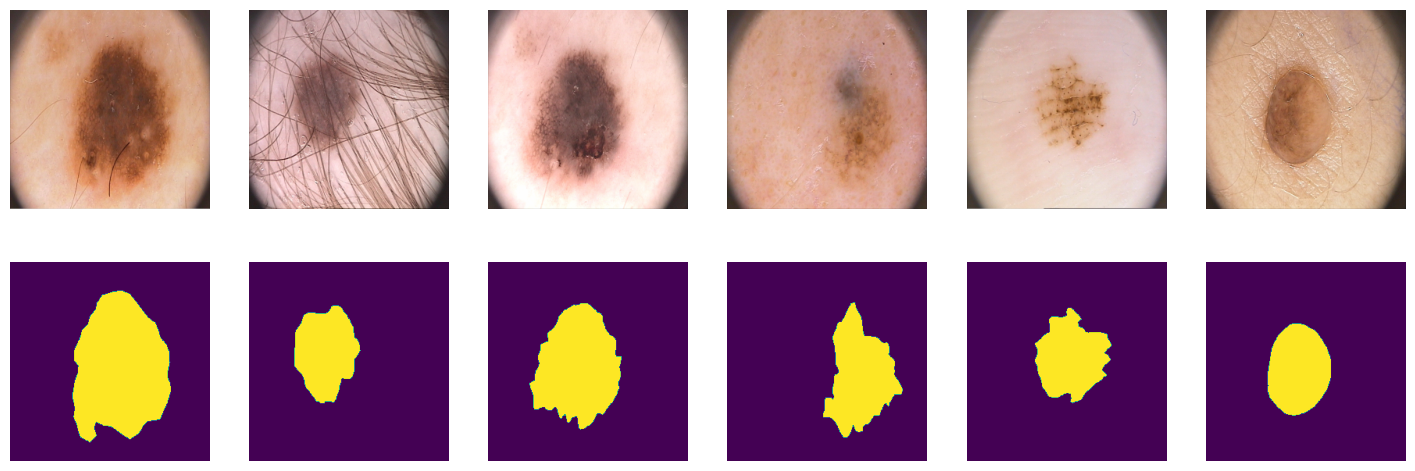

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно

In [ ]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [ ]:
print(len(tr), len(val), len(ts))

100 50 50


#### PyTorch DataLoader

In [ ]:
from torch.utils.data import DataLoader
batch_size = 25
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])),
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Реализация различных архитектур:
Ваше задание будет состоять в том, чтобы написать несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравнить их по качеству на тесте и испробовать различные лосс функции для них.

-----------------------------------------------------------------------------------------

# SegNet

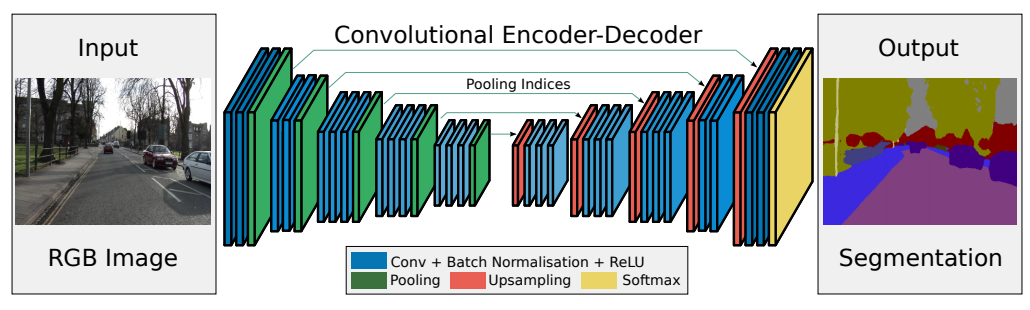

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрите из чего состоит модель и для чего выбраны те или иные блоки.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

In [ ]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)   # 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        self.pool1 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True) # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )
        self.pool2 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)# 64 -> 32
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )
        self.pool3 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)# 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )
        self.upsample1 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        self.upsample2 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.upsample3 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 128 -> 256
        self.dec_conv3 = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=3, padding=1)  # no activation

    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        e0, index0 = self.pool0(e0)
        e1 = self.enc_conv1(e0)
        e1, index1 = self.pool1(e1)
        e2 = self.enc_conv2(e1)
        e2, index2 = self.pool2(e2)
        e3 = self.enc_conv3(e2)
        e3, index3 = self.pool3(e3)

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.upsample0(b, index3)
        d0 = self.dec_conv0(d0)
        d1 = self.upsample1(d0, index2)
        d1 = self.dec_conv1(d1)
        d2 = self.upsample2(d1, index1)
        d2 = self.dec_conv2(d2)
        d3 = self.upsample3(d2, index0)
        d3 = self.dec_conv3(d3) # no activation
        return d3

## Метрика

В данном разделе предлагается использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.


Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):

    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0

    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds

    return thresholded  #

## Функция потерь

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации.

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [ ]:
def bce_loss(y_real, y_pred):
    return (y_pred - (y_real * y_pred) + torch.log(1 + torch.exp(-y_pred))).mean()

## Тренировка

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

In [ ]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    X_val, Y_val = next(iter(data_val))

    # В history будем хранить историю лоссов.
    history = []

    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            # data to device
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)

            # set parameter gradients to zero
            opt.zero_grad()

            # forward
            Y_pred = model(X_batch)
            loss = loss_fn(Y_batch, Y_pred) # forward-pass
            loss.backward()  # backward-pass
            opt.step()  # update weights

            # calculate loss to show the user
            avg_loss += loss / len(data_tr)
        toc = time()
        print('loss: %f' % avg_loss)

        # show intermediate results
        model.eval()  # testing mode

        Y_hat = model(X_val.to(device)).cpu().detach() # detach and put into cpu

        # Вычисляем валидационный лосс
        val_loss = loss_fn(Y_val, Y_hat)

        # Вычисляем скор на валидации
        Y_prob = torch.sigmoid(Y_hat)
        Y_predict = (Y_prob > 0.5).float()
        val_score = iou_pytorch(Y_predict, Y_val).mean().item()

        # Заночим в историй трейн лосс и валидационный лосс для текущей эпохи
        history.append((avg_loss.cpu().detach(), val_loss, val_score))

        # Visualize tools
        clear_output(wait=True)
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, avg_loss))
        plt.show()
    return history

## Инференс [1 балл]

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [ ]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = [ X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [ ]:
def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_prob = torch.sigmoid(model(X_batch.to(device)))
        Y_pred = (Y_prob > 0.5).float()
        scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

## Основной момент: обучение

Обучите вашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
 С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.


In [ ]:
model = SegNet().to(device)

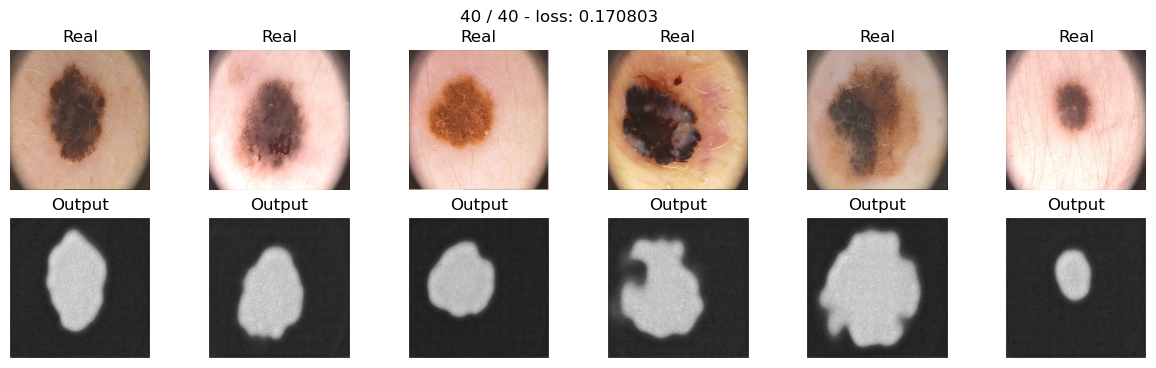

CPU times: total: 2min 44s
Wall time: 2min 29s


In [ ]:
%%time
max_epochs = 40
opt = optim.Adam(model.parameters(), lr=1e-4)
segnet_bce_history = train(model, opt, bce_loss, max_epochs, data_tr, data_val)

In [ ]:
segnet_bce_score = score_model(model, iou_pytorch, data_val)
model.to(torch.device('cpu'))
del model
torch.cuda.empty_cache()
segnet_bce_score

0.7500000298023224

In [ ]:
def print_history(history):
    loss, val_loss, val_score = zip(*history)
    plt.figure(figsize=(7, 4))
    plt.plot(loss, label="train_loss")
    plt.plot(val_loss, label="val_loss")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

    plt.figure(figsize=(7, 4))
    plt.plot(val_score, label="val_score")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("val_score")
    plt.show()

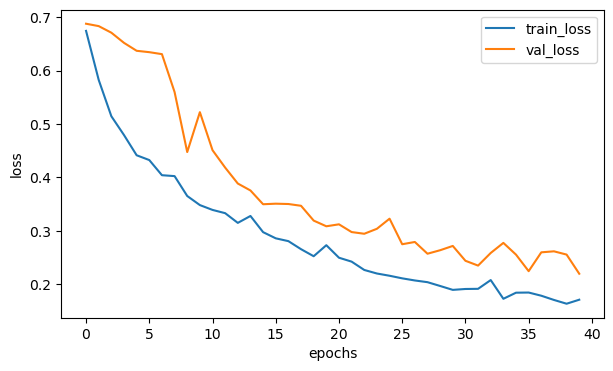

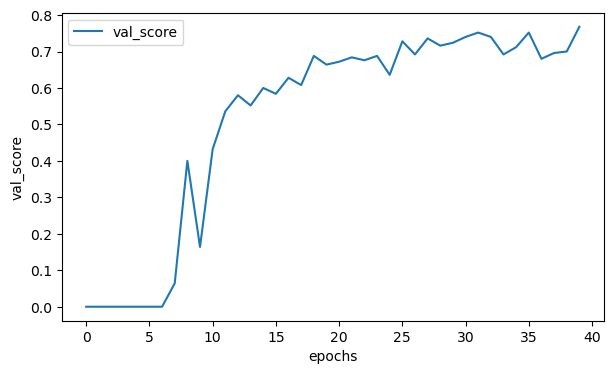

In [ ]:
print_history(segnet_bce_history)

Ответьте себе на вопрос: не переобучается ли моя модель?

Модель не переобучилась. Валидационный лосс снизившись, не стал расти и модель не начала терять способность сегментировать картинки, которые не участвовали в обучении модели. Видим, что скор на валидации продолжал расти.

-----------------------------------------------------------------------------------------

## Дополнительные функции потерь

 В данном разделе вам потребуется имплементировать две функции потерь:
 DICE и Focal loss.
 Если у вас что-то не учится, велика вероятность, что вы ошиблись или учите слишком мало эпох, прежде чем бить тревогу попробуйте перебрать различные варианты и убедитесь, что во всех других сетапах сеть достигает желанного результата. СПОЙЛЕР: учиться она будет при всех лоссах, предложенных в этом задании.


**1. Dice coefficient:** Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \frac{\sum_i2X_iY_i}{\sum_iX_i+Y_i}.$$

Не забудьте подумать о численной нестабильности, возникающей в математической формуле.


In [ ]:
def dice_loss(y_real, y_pred):
    SMOOTH = 1e-8
    y_pred = torch.sigmoid(y_pred)
    num =  (2. * y_pred * y_real).sum()
    den = (y_pred + y_real).sum()
    res = 1 - (((1/(256*256)) * num + SMOOTH) / (den + SMOOTH))
    #res = 1 - ((num + SMOOTH) / (den + SMOOTH))
    return res

Проводим тестирование:

In [ ]:
model_dice = SegNet().to(device)

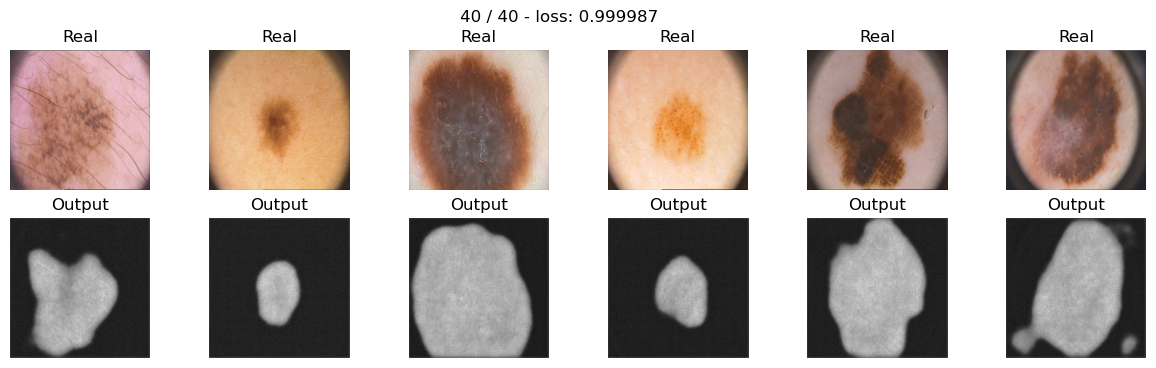

CPU times: total: 2min 57s
Wall time: 2min 26s


In [ ]:
%%time

max_epochs = 40
optimaizer = optim.Adam(model_dice.parameters(), lr=1e-4)
segnet_dice_history = train(model_dice, optimaizer, dice_loss, max_epochs, data_tr, data_val)

In [ ]:
segnet_dice_score = score_model(model_dice, iou_pytorch, data_val)
model_dice.to(torch.device('cpu'))
del model_dice
torch.cuda.empty_cache()
segnet_dice_score

0.6800000071525574

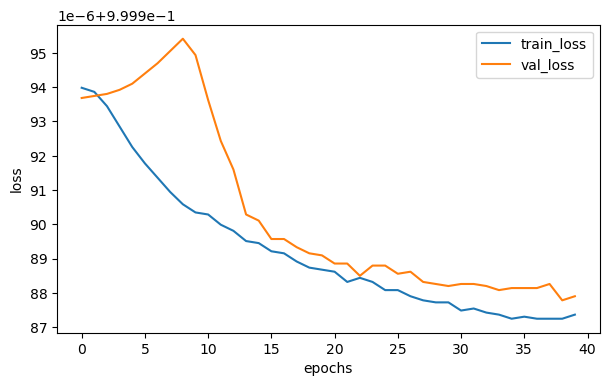

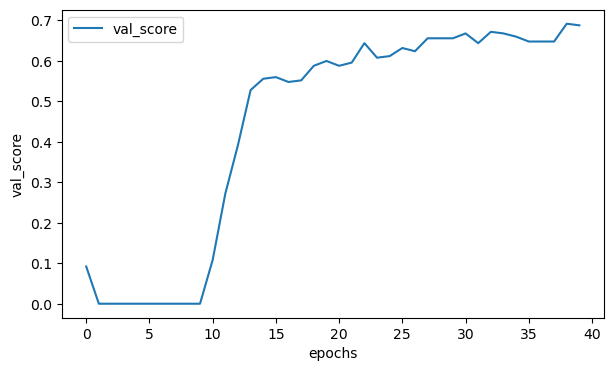

In [ ]:
print_history(segnet_dice_history)

[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf)

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [ ]:
def focal_loss(y_real, y_pred, eps = 1e-8, gamma = 2):
    # Применение сигмоиды к предсказанию
    y_pred = torch.sigmoid(y_pred)

    # Ограничение значений y_pred в диапазоне [eps, 1-eps]
    y_pred = torch.clamp(y_pred, eps, 1.0 - eps)

    # Расчет фокусного потерь
    loss = - (1.0 - y_pred) ** gamma * y_real * torch.log(y_pred) - (1 - y_real) * torch.log(1 - y_pred)

    return loss.sum()


In [ ]:
model_focal = SegNet().to(device)

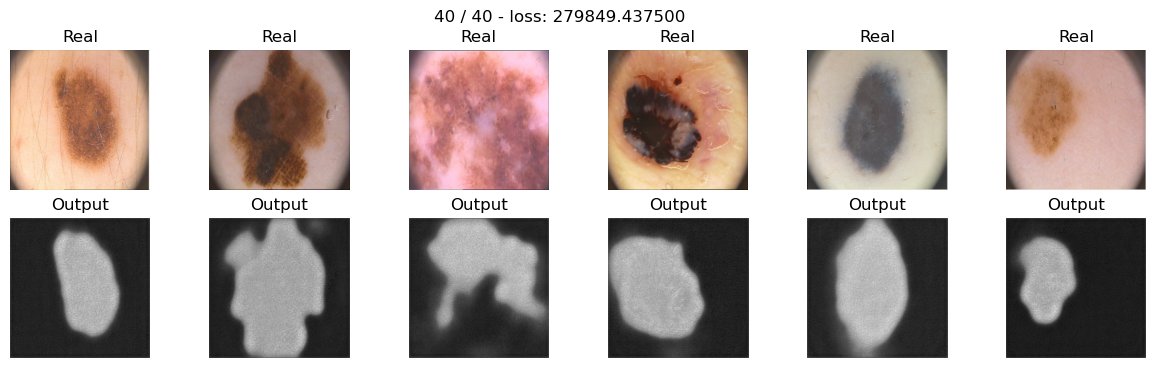

CPU times: total: 2min 57s
Wall time: 2min 27s


In [ ]:
%%time

max_epochs = 40
optimaizer = optim.Adam(model_focal.parameters(), lr=7e-5)
segnet_focal_history = train(model_focal, optimaizer, focal_loss, max_epochs, data_tr, data_val)

In [ ]:
segnet_focal_score = score_model(model_focal, iou_pytorch, data_val)
model_focal.to(torch.device('cpu'))
del model_focal
torch.cuda.empty_cache()
segnet_focal_score

0.7060000002384186

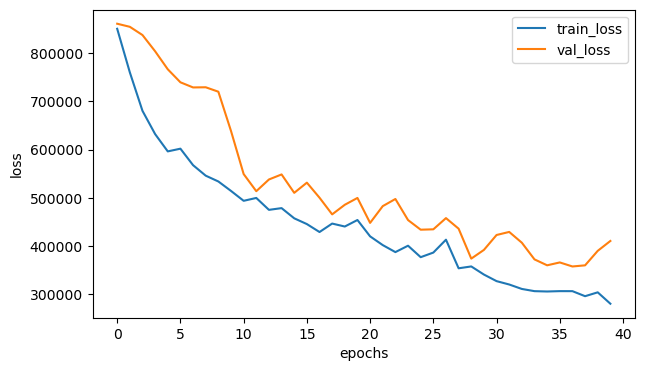

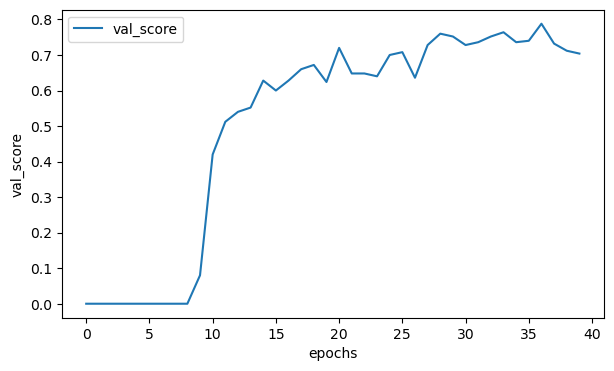

In [ ]:
print_history(segnet_focal_history)

In [ ]:
def tversky_loss(y_true, y_pred, alpha=0.5, beta=0.5, smooth=1e-6):

    y_pred = torch.sigmoid(y_pred)


    y_true_flat = y_true.view(-1)
    y_pred_flat = y_pred.view(-1)

    # True positives, false positives, and false negatives
    tp = torch.sum(y_true_flat * y_pred_flat)
    fp = torch.sum((1 - y_true_flat) * y_pred_flat)
    fn = torch.sum(y_true_flat * (1 - y_pred_flat))

    # Tversky loss
    tversky = (tp + smooth) / (tp + alpha * fp + beta * fn + smooth)

    # Return the Tversky loss
    return 1 - tversky

In [ ]:
model_tversky = SegNet().to(device)

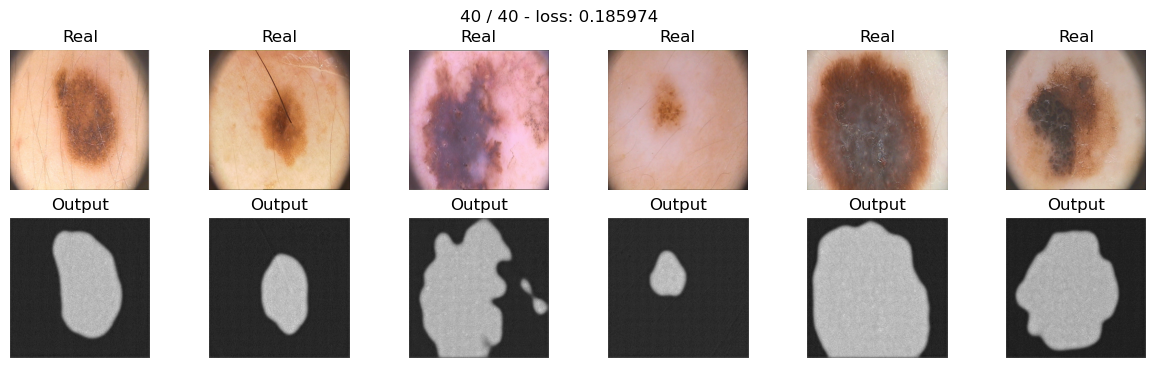

CPU times: total: 2min 51s
Wall time: 2min 27s


In [ ]:
%%time

max_epochs = 40
optimaizer = optim.Adam(model_tversky.parameters(), lr=7e-5)
segnet_tversky_history = train(model_tversky, optimaizer, tversky_loss, max_epochs, data_tr, data_val)

In [ ]:
segnet_tversky_score = score_model(model_tversky, iou_pytorch, data_val)
model_tversky.to(torch.device('cpu'))
del model_tversky
torch.cuda.empty_cache()
segnet_tversky_score

0.6860000193119049

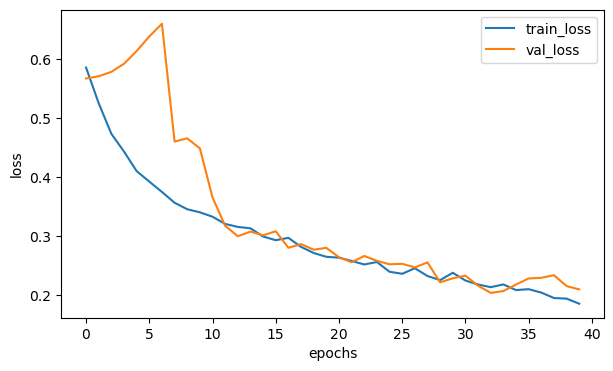

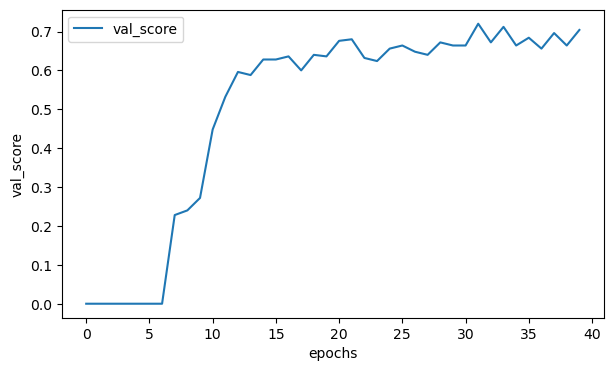

In [ ]:
print_history(segnet_tversky_history)

-----------------------------------------------------------------------------------------

## U-Net

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

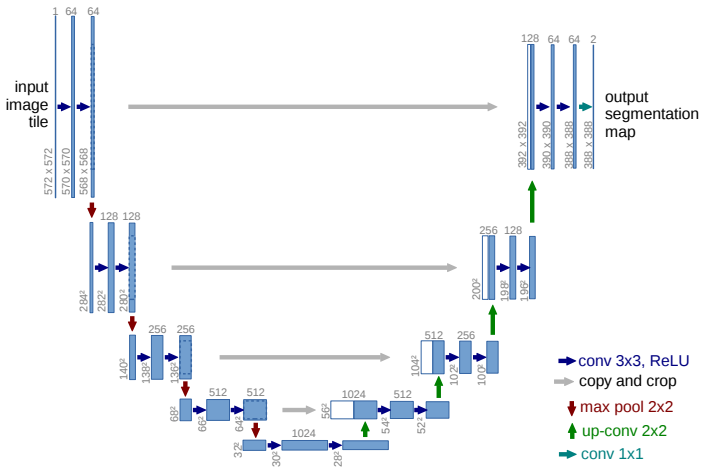

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)   # 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        self.pool1 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True) # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )
        self.pool2 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)# 64 -> 32
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )
        self.pool3 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)# 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )
        self.upsample1 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        self.upsample2 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.upsample3 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, padding=0),
        )
        # self.dec_conv3 = nn.Conv2d(in_channels=128, out_channels=1, kernel_size=3, padding=1)  # no activation

    def forward(self, x):
        # encoder
        e01 = self.enc_conv0(x)
        e0, index0 = self.pool0(e01)
        e11 = self.enc_conv1(e0)
        e1, index1 = self.pool1(e11)
        e21 = self.enc_conv2(e1)
        e2, index2 = self.pool2(e21)
        e31 = self.enc_conv3(e2)
        e3, index3 = self.pool3(e31)

        # bottleneck
        b = self.bottleneck_conv(e3)

        d0 = self.upsample0(b, index3)
        # print(d0.size())
        d0 = torch.cat((d0, e31), dim=1)
        # print(d0.size())
        # print(e31.size())
        d0 = self.dec_conv0(d0)
        d1 = self.upsample1(d0, index2)
        d1 = torch.cat((d1, e21), dim=1)
        d1 = self.dec_conv1(d1)
        d2 = self.upsample2(d1, index1)
        d2 = torch.cat((d2, e11), dim=1)
        d2 = self.dec_conv2(d2)
        d3 = self.upsample3(d2, index0)
        d3 = torch.cat((d3, e01), dim=1)
        d3 = self.dec_conv3(d3) # no activation
        return d3

In [ ]:
unet_model = UNet().to(device)

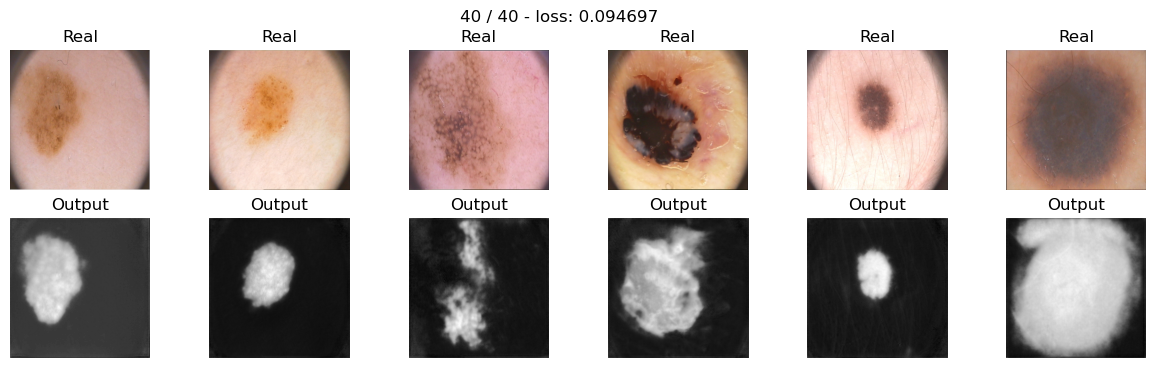

CPU times: total: 8min 23s
Wall time: 11min


In [ ]:
%%time
unet_bce_history = train(unet_model, optim.Adam(unet_model.parameters(), lr=1e-4), bce_loss, 40, data_tr, data_val)

In [ ]:
unet_bce_score = score_model(unet_model, iou_pytorch, data_val)
unet_model.to(torch.device('cpu'))
del unet_model
torch.cuda.empty_cache()
unet_bce_score

0.7400000095367432

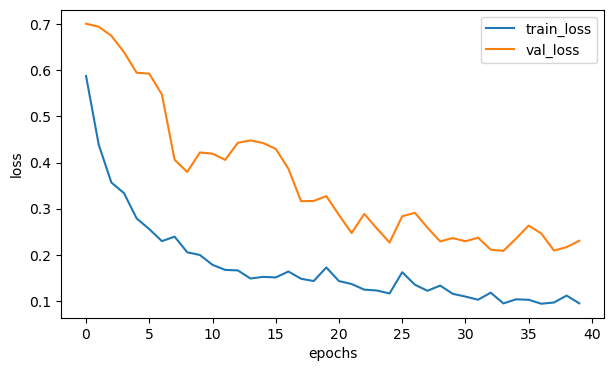

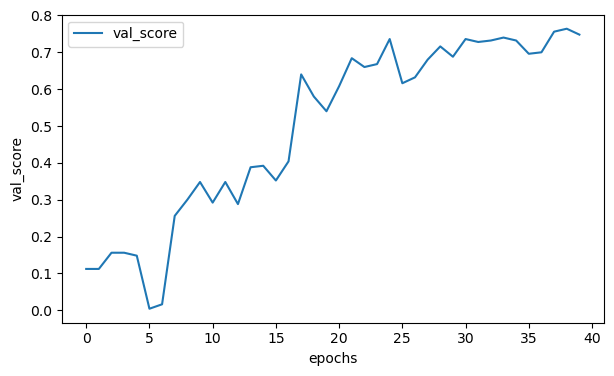

In [ ]:
print_history(unet_bce_history)

Новая модель путем изменения типа пулинга:

 **Max-Pooling** for the downsampling and **nearest-neighbor Upsampling** for the upsampling.

Down-sampling:

        conv = nn.Conv2d(3, 64, 3, padding=1)
        pool = nn.MaxPool2d(3, 2, padding=1)

Up-Sampling

        upsample = nn.Upsample(32)
        conv = nn.Conv2d(64, 64, 3, padding=1)

Замените max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2.


In [ ]:
class UNet2(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        # self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)   # 256 -> 128
        self.pool0 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=2, padding=0)
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        # self.pool1 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True) # 128 -> 64
        self.pool1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2, stride=2, padding=0)
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )
        # self.pool2 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)# 64 -> 32
        self.pool2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2, stride=2, padding=0)
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )
        # self.pool3 =  nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)# 32 -> 16
        self.pool3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=2, stride=2, padding=0)

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )

        # decoder (upsampling)
        # self.upsample0 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 16 -> 32
        self.upsample0 = nn.ConvTranspose2d(in_channels=512, out_channels=512, kernel_size=2, stride=2)  # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )
        # self.upsample1 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 32 -> 64
        self.upsample1 = nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=2, stride=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        # self.upsample2 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 64 -> 128
        self.upsample2 = nn.ConvTranspose2d(in_channels=128, out_channels=128, kernel_size=2, stride=2) #  64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        # self.upsample3 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 128 -> 256
        self.upsample3 = nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=2, stride=2) # 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, padding=0),
        )
        # self.dec_conv3 = nn.Conv2d(in_channels=128, out_channels=1, kernel_size=3, padding=1)  # no activation

    def forward(self, x):
        # encoder
        e01 = self.enc_conv0(x)
        e0 = self.pool0(e01)
        e11 = self.enc_conv1(e0)
        e1 = self.pool1(e11)
        e21 = self.enc_conv2(e1)
        e2 = self.pool2(e21)
        e31 = self.enc_conv3(e2)
        e3 = self.pool3(e31)

        # bottleneck
        b = self.bottleneck_conv(e3)

        d0 = self.upsample0(b)
        # print(d0.size())
        d0 = torch.cat((d0, e31), dim=1)
        # print(d0.size())
        # print(e31.size())
        d0 = self.dec_conv0(d0)
        d1 = self.upsample1(d0)
        d1 = torch.cat((d1, e21), dim=1)
        d1 = self.dec_conv1(d1)
        d2 = self.upsample2(d1)
        d2 = torch.cat((d2, e11), dim=1)
        d2 = self.dec_conv2(d2)
        d3 = self.upsample3(d2)
        d3 = torch.cat((d3, e01), dim=1)
        d3 = self.dec_conv3(d3) # no activation
        return d3

In [ ]:
unet2_model = UNet2().to(device)

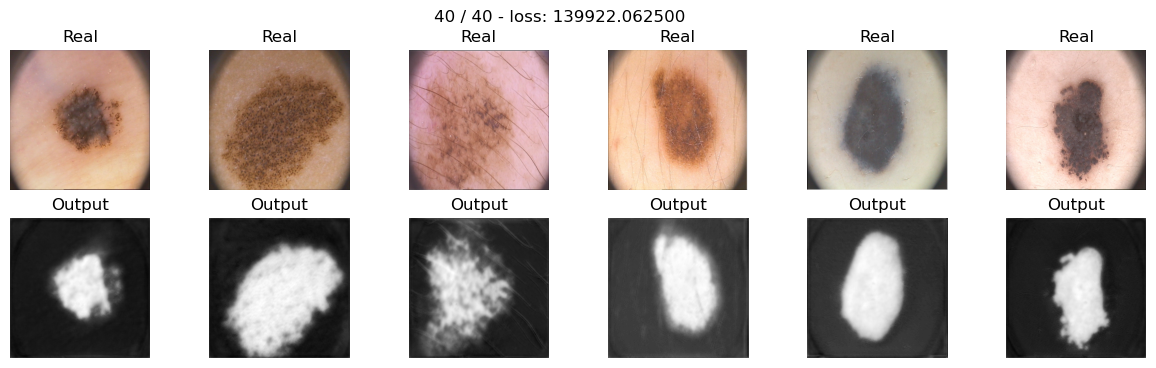

CPU times: total: 8min 37s
Wall time: 10min 28s


In [ ]:
%%time
unet2_bce_history = train(unet2_model, optim.Adam(unet2_model.parameters(), lr=1e-4), bce_loss, 40, data_tr, data_val)

In [ ]:
unet2_bce_score = score_model(unet2_model, iou_pytorch, data_val)
unet2_bce_score

0.7100000083446503

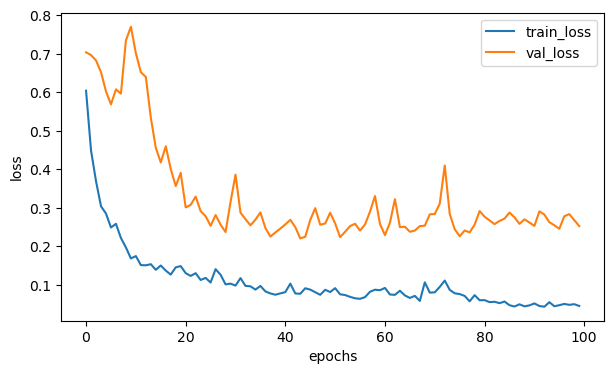

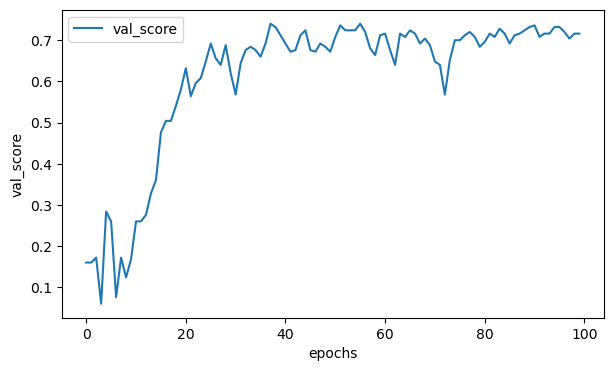

In [ ]:
print_history(unet2_bce_history)

Сделайте вывод, какая из моделей лучше
Ответ: Модель U-Net2 иногда работает лучше, а иногда так же как U-Net. Замена max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2 может улучшать качество работы модели.

In [ ]:
import pandas as pd
def loss_compare():
    data = {
        'segnet_bce_score': [segnet_bce_score],
        'segnet_dice_score': [segnet_dice_score],
        'segnet_focal_score': [segnet_focal_score],
        'segnet_tversky_score': [segnet_tversky_score]
    }

    df = pd.DataFrame(data)

    display(df)

    bce_loss, bce_val_loss, bce_val_score = zip(*segnet_bce_history)
    dice_loss, dice_val_loss, dice_val_score = zip(*segnet_dice_history)
    focal_loss, focal_val_loss, focal_val_score = zip(*segnet_focal_history)
    tversky_loss, tversky_val_loss, tversky_val_score = zip(*segnet_tversky_history)

    plt.figure(figsize=(7, 4))
    plt.plot(bce_val_score, label="bce_val_score")
    plt.plot(dice_val_score, label="dice_val_score")
    plt.plot(focal_val_score, label="focal_val_score")
    plt.plot(tversky_val_score, label="tversky_val_score")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("score")
    plt.title("Different losses compare on Segnet")
    plt.show()

In [ ]:
def model_compare():
    data = {
        'segnet_bce_score': [segnet_bce_score],
        'unet_bce_score': [unet_bce_score],
        'unet2_bce_score': [unet2_bce_score],
    }

    df = pd.DataFrame(data)

    display(df)


    bce_loss, bce_val_loss, bce_val_score = zip(*segnet_bce_history)
    unet_loss, unet_val_loss, unet_val_score = zip(*unet_bce_history)
    unet2_loss, unet2_val_loss, unet2_val_score = zip(*unet2_bce_history)

    # Отображаем сравенение лоссов моделей на трейне
    plt.figure(figsize=(7, 4))
    plt.plot(bce_loss, label="Segnet")
    plt.plot(unet_loss, label="U-Net")
    plt.plot(unet2_loss, label="U-Net2")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("train_loss")
    plt.title("Train Loss on different models")
    plt.show()

    # Отображаем сравенение лоссов моделей на валидации
    plt.figure(figsize=(7, 4))
    plt.plot(bce_val_loss, label="Segnet")
    plt.plot(unet_val_loss, label="U-Net")
    plt.plot(unet2_val_loss, label="U-Net2")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("valid_loss")
    plt.title("Valid Loss on different models")
    plt.show()

    # Отображаем сравенение скоров моделей на валидации
    plt.figure(figsize=(7, 4))
    plt.plot(bce_val_score, label="Segnet")
    plt.plot(unet_val_score, label="U-Net")
    plt.plot(unet2_val_score, label="U-Net2")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("valid_score")
    plt.title("Valid Score (on one batche) on different models")
    plt.show()

### Проверка эффективности разных функций потерь для Segnet

Были проверены три функции потерь для модели сегментации Segnet

* BCE loss
* Dice coefficient
* Focal loss
* Tversky loss
И были получены следующие результаты:


segnet_bce_score  segnet_dice_score  segnet_focal_score  \
0              0.75               0.68               0.706   

   segnet_tversky_score  
0                 0.686

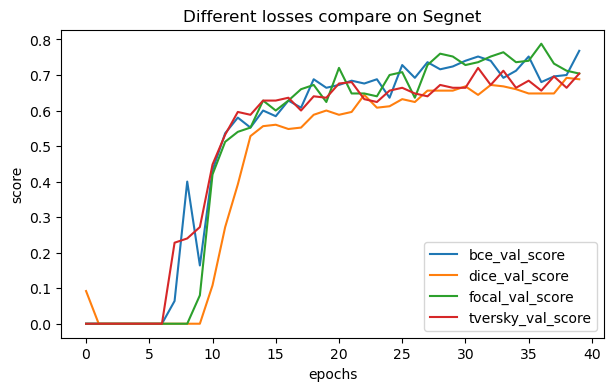

In [ ]:
loss_compare()

Принципиальной разницы в качестве обучения моделей при разных типах лоссов обнаружено не было. В тоже время Dice Loss периодически показывает более низкие результаты. `Focal loss` часто показывает хорошие результаты но не всегда лучше чем BCE loss. При использовании стандартного

### Проверка эффективности разных моделей при сегментации изображений

segnet_bce_score  unet_bce_score  unet2_bce_score
0              0.75            0.74             0.71

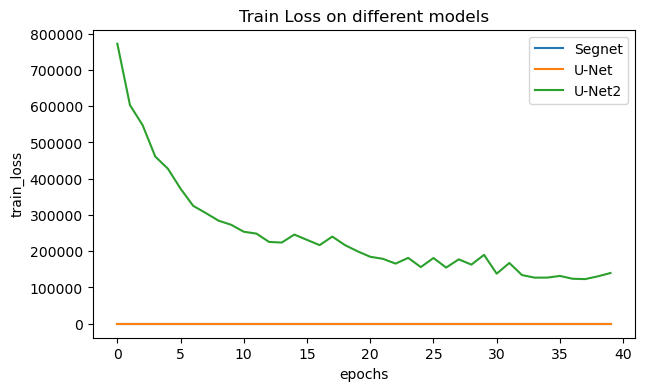

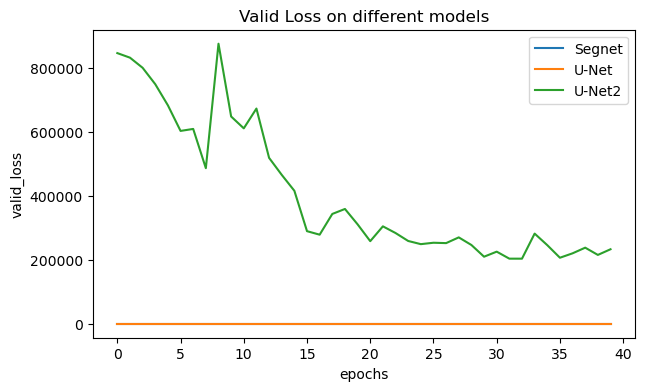

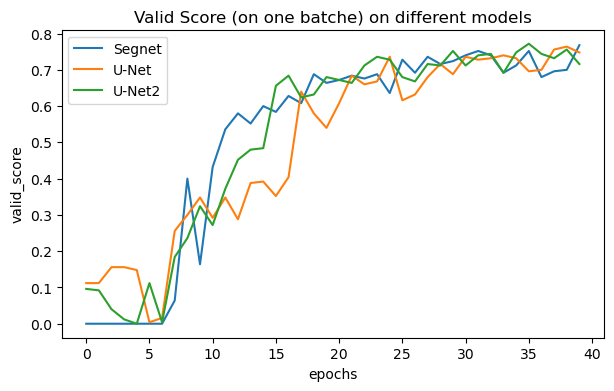

In [ ]:
model_compare()

### Тестируем лучшую модель

В целом модели довольно близки по качеству. Боее интересной моделью мне показалась U-NET2. Протестируем ее на тестовой выборке

In [ ]:
unet2_bce_score = score_model(unet2_model, iou_pytorch, data_ts)
#unet2_model.to(torch.device('cpu'))
#del unet2_model
#torch.cuda.empty_cache()
unet2_bce_score

0.6739999949932098

### Вывод

Видим, что U-Net2 в ходе обучения по скору часто показывает себя лучше других моделей. Таким образом, добавление информации из слоя энкодера в соответсвующий слой декодера, до сжатия информации пулингом дает позитивный эффект для выбранного нами скора. И, что более интересно, картинка на выходе получается даже более подробно и близко к реальности сегментирована в плане вероятности принадлежности точки картинки к родинке, чем целевая маска сегментации на которой обучалась модель.